In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
import torchxrayvision as xrv
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.utils import to_categorical

In [3]:
new_img_height = 128
new_img_width = 128
channels = 3

# **VGG19**

In [4]:
CLASS_NAMES= ['No Finding', 'COVID-19']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_x = np.load('train_x.npy')
train_label = np.load('train_label.npy')
test_x = np.load('test_x.npy')
test_label = np.load('test_label.npy')
validation_x = np.load('validation_x.npy')
validation_label = np.load('validation_label.npy')

In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
train_label.dtype

dtype('float16')

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image

from IPython.display import SVG
import scipy.misc

In [10]:
import efficientnet.tfkeras as efc

In [11]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications import *

In [12]:
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [13]:
model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(128,128,3),
    pooling=None,
    classes=2,
    classifier_activation="softmax",
#    **kwargs
)

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

new_model = models.Sequential()
new_model.add(model)
#2rd conv layer
new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#3th conv layer
new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#Flatten Layer
new_model.add(tf.keras.layers.Flatten())

new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.Dropout(0.2))
#output Dense Layer
new_model.add(tf.keras.layers.Dense(2))
new_model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


In [15]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 32)          147488    
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 32)          128       
_________________________________________________________________
activation (Activation)      (None, 4, 4, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 64)          2

In [16]:
epochs = 50
num_classes = 2

#compila e treina o modelo com os dados carregados
new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = new_model.fit(train_x, train_label,epochs=epochs,verbose=1,validation_data=(validation_x, validation_label),shuffle=False)

Epoch 1/50
50/50 [==============================] - 24s 472ms/step - loss: 1.2670 - acc: 0.6011 - val_loss: 29.0806 - val_acc: 0.4861
Epoch 2/50
50/50 [==============================] - 19s 385ms/step - loss: 0.8859 - acc: 0.6295 - val_loss: 0.9343 - val_acc: 0.4861
Epoch 3/50
50/50 [==============================] - 19s 384ms/step - loss: 0.7287 - acc: 0.6597 - val_loss: 22.9398 - val_acc: 0.4861
Epoch 4/50
50/50 [==============================] - 19s 386ms/step - loss: 0.6380 - acc: 0.7064 - val_loss: 66.9344 - val_acc: 0.4861
Epoch 5/50
50/50 [==============================] - 19s 385ms/step - loss: 0.6004 - acc: 0.7133 - val_loss: 89.0085 - val_acc: 0.4861
Epoch 6/50
50/50 [==============================] - 19s 385ms/step - loss: 0.5767 - acc: 0.7234 - val_loss: 15.1618 - val_acc: 0.5139
Epoch 7/50
50/50 [==============================] - 19s 388ms/step - loss: 0.5860 - acc: 0.7114 - val_loss: 2.3730 - val_acc: 0.5139
Epoch 8/50
50/50 [==============================] - 19s 383ms/st

In [17]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

**Random Forest**

In [18]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [19]:
test_x = np.load('test_x.npy')
test_label = np.load('test_label.npy')

In [21]:
new_model2 = keras.Model(inputs=new_model.input, outputs=new_model.get_layer('flatten').output)
featureVector = new_model2.predict(train_x)

In [22]:
featureVector2 = new_model2.predict(test_x)


In [23]:
print(featureVector.shape)

(1587, 64)


In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(featureVector,train_label)



RandomForestClassifier()

In [26]:
test_x.shape

(497, 128, 128, 3)

In [27]:
y_pred=clf.predict(featureVector2)

In [28]:
featureVector.shape

(1587, 64)

In [29]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_label, y_pred))

Accuracy: 0.8631790744466801


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt = DecisionTreeClassifier(random_state=0)

# **Testes**

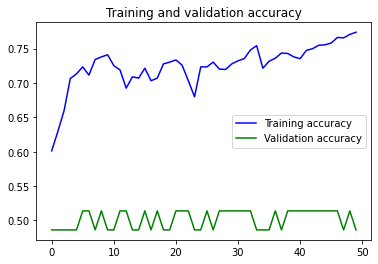

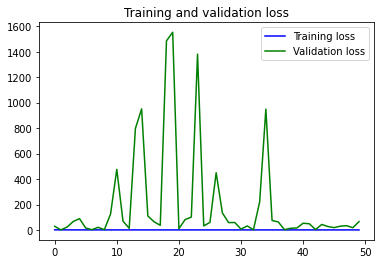

In [32]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [33]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_label, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

16/16 [==============================] - 2s 103ms/step - loss: 64.5261 - acc: 0.4950
Test loss: 64.52608489990234
Test accuracy: 0.49496981501579285


In [34]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [36]:
cm = confusion_matrix(test_label, pred_probs)

In [37]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_label, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.32775928789425657
Sensitivity: [0. 1.]
Specificity: [1. 0.]
Precision:   [       nan 0.49496982]
Accuracy:    [0.49496982 0.49496982]
